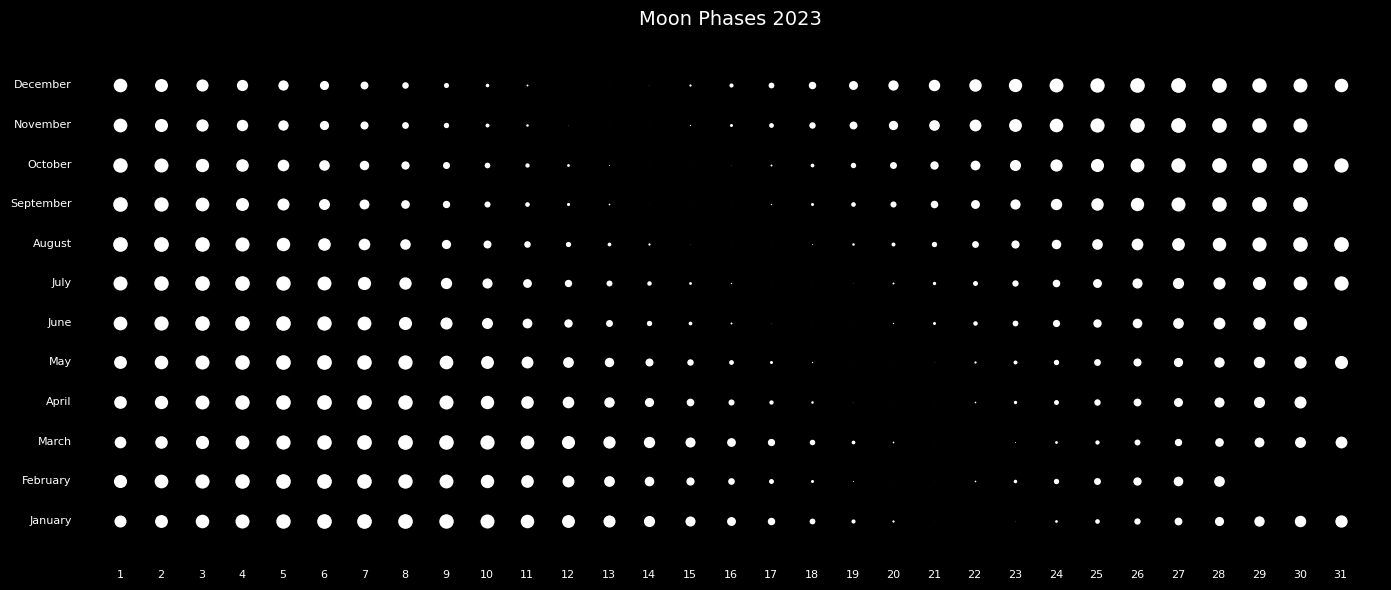

In [ ]:
# I came across a moon phases plot in the d3 examples library.
# It's an impressive plot, and you can find it here https://observablehq.com/@mbostock/phases-of-the-moon
# I attempted to recreate this example in Python, but it didn't quite work out as expected. I'm still exploring how to vertically slice the circle (failed attempt)

# Import necessary modules
import ephem # For celestial calculations
import calendar # Calendar related functionality
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta # For working with dates and times

# Function to get the moon phase for a specific date
def get_moon_phase(date):
    observer = ephem.Observer()
    observer.date = date
    moon = ephem.Moon(observer)
    return moon.phase

# Function to convert moon phase value to a custom marker size for plotting
def phase_to_marker(phase):
    # Convert phase value to a custom marker size
    return max(1, int(phase / 29.5 * 40))  # Scale phase to a marker size between 1 and 100

# Function to plot moon phases for a given year and month
def plot_moon_phases_for_month(year, month):
    # Define start and end dates for the month
    start_date = datetime(year, month, 1)
    num_days_in_month = calendar.monthrange(year, month)[1]
    end_date = start_date + timedelta(days=num_days_in_month)
    # Set the step size for iterating through each day of the month
    delta = timedelta(days=1)
    # Create empty list for dates and phases
    dates = []
    phases = []

    # Loop through each day of the month and calculate moon phases
    current_date = start_date
    while current_date < end_date:
        phase = get_moon_phase(current_date)
        dates.append(current_date)
        phases.append(phase)
        current_date += delta

    return dates, phases

if __name__ == "__main__":
    year = 2023

    # Create a figure and axis to plot all months
    fig, ax = plt.subplots(figsize=(14, 6))

    for month in range(1, 13):  # Loop through all 12 months
        dates, phases = plot_moon_phases_for_month(year, month)

        # Plot scatter plot for the month
        for date, phase in zip(dates, phases):
            day = date.day
            marker_size = phase_to_marker(phase)

            # Plot custom marker representing the moon phase
            ax.scatter(day, month, s=marker_size, color='white', edgecolors='black')

        # Add label for the month to the left side of the plot
        month_name = datetime(year, month, 1).strftime("%B")
        ax.text(-0.2, month, month_name, ha='right', va='center', color='white', fontsize=8)

    ax.set_xlim(0, 32)
    ax.set_ylim(0, 13)
    ax.set_xticks(np.arange(1, 32))
    ax.set_yticks(np.arange(1, 13))
    ax.set_xticklabels(np.arange(1, 32), color='white', fontsize=8)
    ax.set_yticklabels([])
    #ax.set_xlabel('Day', color='white', fontsize=10)
    ax.set_title(f'Moon Phases {year}', pad=15, color='white', fontsize=14)

    # Set the color of the x-axis ticks to white
    # ax.tick_params(axis='x', colors='white')

    # Set the background color of the entire figure to black
    fig.patch.set_facecolor('black')
    # Also set the face color of the plot to black
    ax.set_facecolor('black')

    # Add Moon Phase Titles (Not needed)
    #ax.text(3, 12.5, 'New Moon', ha='center', va='center', color='white', fontsize=10)
    #ax.text(11, 12.5, 'First Quarter', ha='center', va='center', color='white', fontsize=10)
    #ax.text(19, 12.5, 'Full Moon', ha='center', va='center', color='white', fontsize=10)
    #ax.text(27, 12.5, 'Last Quarter', ha='center', va='center', color='white', fontsize=10)

    plt.tight_layout()
    plt.show()


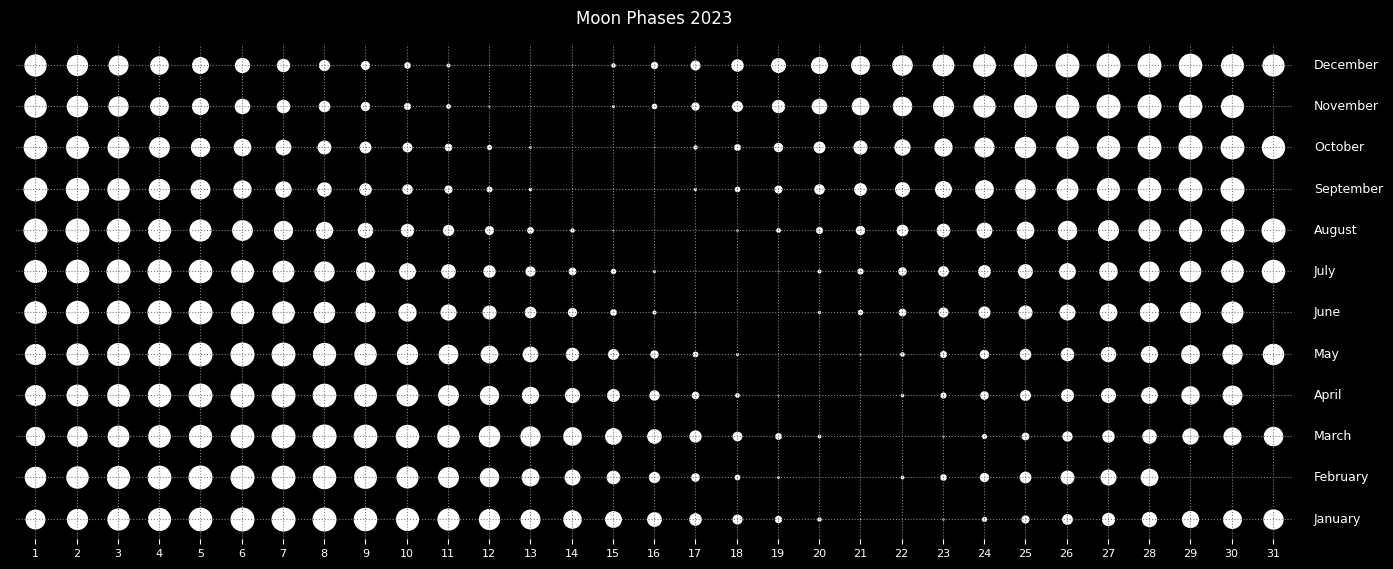

In [ ]:
# Let's experiment a bit to enhance the visualization and see how it improves the overall display.
import ephem
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta

def get_moon_phase(date):
    observer = ephem.Observer()
    observer.date = date
    moon = ephem.Moon(observer)
    return moon.phase

def phase_to_marker(phase):
    return max(1, int(phase / 29.5 * 100))  # Scale phase to a marker size between 1 and 100

def plot_moon_phases_for_month(year, month):
    start_date = datetime(year, month, 1)
    num_days_in_month = calendar.monthrange(year, month)[1]
    end_date = start_date + timedelta(days=num_days_in_month)

    delta = timedelta(days=1)

    dates = []
    phases = []

    current_date = start_date
    while current_date < end_date:
        phase = get_moon_phase(current_date)
        dates.append(current_date)
        phases.append(phase)
        current_date += delta

    return dates, phases

if __name__ == "__main__":
    year = 2023

    # Create a figure and axis to plot all months
    fig, ax = plt.subplots(figsize=(14, 6))

    for month in range(1, 13):  # Loop through all 12 months
        dates, phases = plot_moon_phases_for_month(year, month)

        # Plot scatter plot for the month
        for date, phase in zip(dates, phases):
            day = date.day
            marker_size = phase_to_marker(phase)

            # Plot custom marker representing the moon phase
            ax.scatter(day, month, s=marker_size, color='white', edgecolors='black')

        # Add label for the month to the left side of the plot
        month_name = datetime(year, month, 1).strftime("%B")
        ax.text(0, month, month_name, ha='left', va='center', color='white', fontsize=9)

    ax.set_xlim(0.5, 31.5)
    ax.set_ylim(0.5, 12.5)
    ax.set_xticks(np.arange(1, 32))
    ax.set_yticks(np.arange(1, 13))
    ax.set_xticklabels(np.arange(1, 32), color='white', fontsize=8)
    ax.set_yticklabels([])
    #ax.set_xlabel('Day', color='white', fontsize=10)
    ax.set_title(f'Moon Phases {year}', pad=15, color='white')

    # Set the color of the x-axis ticks to white
    ax.tick_params(axis='x', colors='white')

    # Set the background color of the entire figure to black
    fig.patch.set_facecolor('black')
    # Also set the face color of the plot to black
    ax.set_facecolor('black')

    # Add grid lines
    ax.grid(True, linestyle='dotted', color='gray')

    # Set aspect ratio to make markers circular
    ax.set_aspect('equal')

    # Remove frame around the plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    # Move the month labels to the right side of the plot with added spacing
    for text in ax.texts:
        text.set_x(31 + 1)  # Increase the spacing between month names and the right side of the plot

        # Add background color behind the month names for better visibility
        text.set_bbox({'facecolor': 'black', 'alpha': 0.8, 'edgecolor': 'none'})

    plt.tight_layout()
    plt.show()